In [3]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [16]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [17]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

C:\Users\lenar\AppData\Local\Temp\ipykernel_16312\930725367.py:5: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [18]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [19]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [20]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [21]:
# Find the most recent date in the data set.
most_recent = session.query(func.max(Measurement.date)).first()
most_recent_str = most_recent[0]
print(f"The most recent date is: {most_recent}")

The most recent date is: ('2017-08-23',)


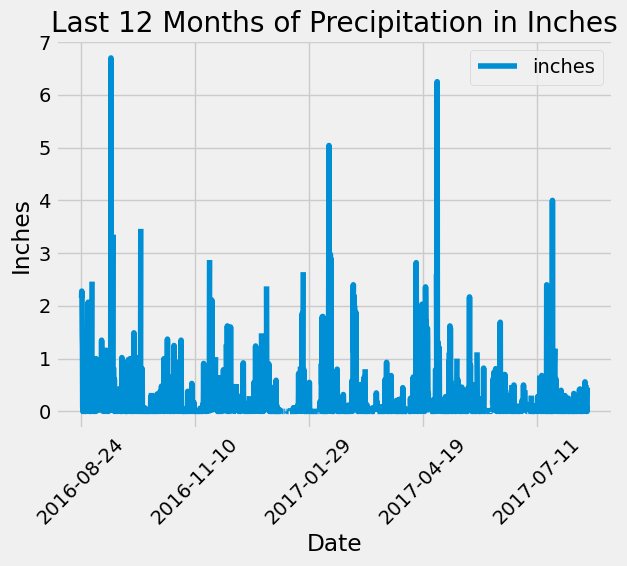

In [22]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Convert most recent date to an object
most_recent = dt.datetime.strptime(most_recent_str, '%Y-%m-%d')

# Calculate the date one year from the last date in data set.
one_year_ago = most_recent - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
precipitation_score = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= one_year_ago).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(precipitation_score, columns=['date', 'inches'])

# Sort the dataframe by date
df = df.sort_values('date')

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(x='date', y='inches', title='Last 12 Months of Precipitation in Inches')
plt.xlabel('Date')
plt.ylabel('Inches')
plt.xticks(rotation=45)
plt.show()


In [23]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_stats = df['inches'].describe()
print(summary_stats)

count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: inches, dtype: float64


# Exploratory Station Analysis

In [24]:
# Design a query to calculate the total number of stations in the dataset
session.query(Station).count()

9

In [14]:
# Count how many times each station ID appears in the Measurement table
station_counts = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

# Print the result
print('Station Activity:')
for station_id, count in station_counts:
    print(f'{station_id}: {count} rows')


Station Activity:
USC00519281: 2772 rows
USC00519397: 2724 rows
USC00513117: 2709 rows
USC00519523: 2669 rows
USC00516128: 2612 rows
USC00514830: 2202 rows
USC00511918: 1979 rows
USC00517948: 1372 rows
USC00518838: 511 rows


In [25]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active = 'USC00519281'

temperature_stats = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == most_active).all()

# Print the results
print(f"Lowest Temperature: {temperature_stats[0][0]}")
print(f"Highest Temperature: {temperature_stats[0][1]}")
print(f"Average Temperature: {temperature_stats[0][2]}")

Lowest Temperature: 54.0
Highest Temperature: 85.0
Average Temperature: 71.66378066378067


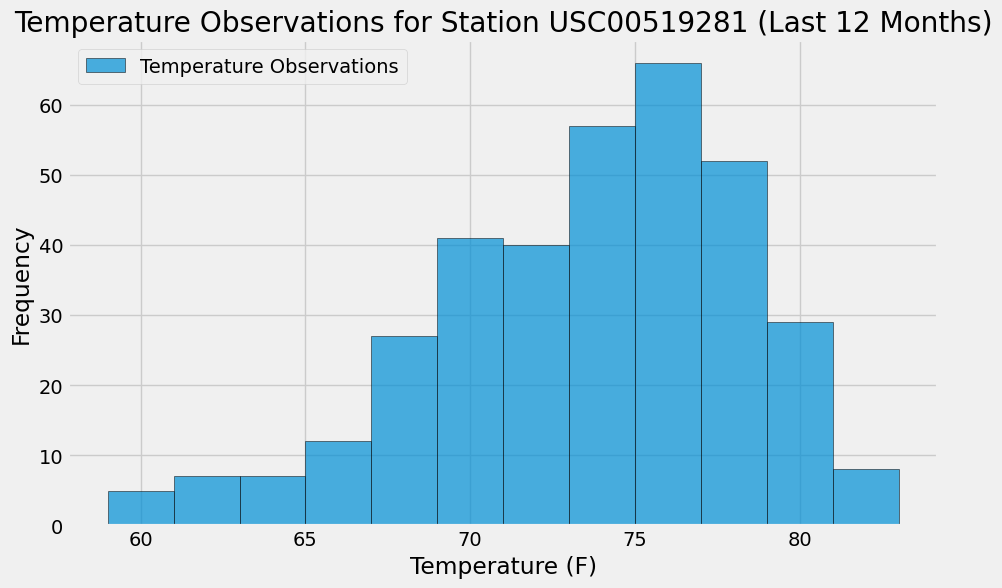

In [18]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

temperature_data = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.station == most_active, Measurement.date >= one_year_ago).all()

# Save to DF
df = pd.DataFrame(temperature_data, columns=['date', 'temperature'])

# Plot the results as a histogram

plt.figure(figsize=(10,6))
plt.hist(df['temperature'], bins=12, label='Temperature Observations', alpha=0.7, edgecolor='black')
plt.title('Temperature Observations for Station USC00519281 (Last 12 Months)')
plt.xlabel('Temperature (F)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Close Session

In [19]:
# Close Session
session.close()